# Exploratory Data Analysis of CDP dataset 


Se the documentation of the dataset [here](https://github.com/OpenGeoScales/ogs-data-exploration/blob/main/data/ghg-emissions/cdp/README.md) for more details on the data source and methods of calculations

### Summary :
1. Missing values
2. Geospacial coverage
3. Temporal coverage
4. Emissions analysis
5. Gases included

**To Do :**
- [x] geospacial analysis
- [x] update geospacial analysis considering that many cities do not have any emissions (490 VS 723)
- [x] create new columns scope_1, Scope_2 and Scope_3 with the total value of emissions
- [ ] check what are BASIC emissions
- [ ] analysis of emissions time series (min/max, distribution)

Also :
- [ ] see why some cities appear 4 times (Stockolhm for example)
- [ ] Missing cities: extract city name from "Organization" by matching it with a reference list (of cities names per country)
- [ ] plot cities in a map to assert that coordinates are actually true (do it for some countries)



In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_18 = pd.read_csv("../../../data/ghg-emissions/cdp/2018_-_2019_City-wide_Emissions.csv")
data_19 = pd.read_csv("../../../data/ghg-emissions/cdp/2019_City-wide_Emissions.csv")
data_20 = pd.read_csv("../../../data/ghg-emissions/cdp/2020_-_City-Wide_Emissions.csv")

In [3]:
# Adding missing columns for 2018 and 2020 : "Administrative city boundary"
# Adding missing column for 2020 : "Reporting Authority"

data_18.insert( 10, "Administrative city boundary", "not present in this year's report")
data_19.insert( 10, "Administrative city boundary", "not present in this year's report")

data_20.insert(6, "Reporting Authority", "not present in this year's report")

In [4]:
# check that columns are the same in all 3 dataframes
pd.DataFrame({"data_18": data_18.columns,
            "data_19": data_19.columns,
            "data_20": data_20.columns})

,data_18,data_19,data_20
0,Year Reported to CDP,Year Reported to CDP,Year Reported to CDP
1,Account Number,Account Number,Account Number
2,Organization,Organization,Organization
3,City,City,City
4,Country,Country,Country
5,CDP Region,CDP Region,CDP Region
6,Reporting Authority,Reporting Authority,Reporting Authority
7,Access,Access,Access
8,City-wide Emissions Inventory,City-wide Emissions Inventory,City-wide emissions inventory
9,Accounting Year,Accounting Year,Accounting year


In [5]:
print(f"number of records in 2018 : {data_18.shape[0]}")
print(f"number of records in 2019 : {data_19.shape[0]}")
print(f"number of records in 2020 : {data_20.shape[0]}")

number of records in 2018 : 1302
number of records in 2019 : 814
number of records in 2020 : 776


In [6]:
# we concatenate the dataframes and drop duplicates
data_18.columns = data_20.columns
data_19.columns = data_20.columns

data = pd.concat([data_18, data_19, data_20], ignore_index = False)
data = data.drop_duplicates()
data.reset_index(inplace = True)

In [7]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns")

The dataset has 2196 rows and 35 columns


In [8]:
data.describe();

# Missing values of emissions

In [9]:
# Mask to select rows without any emissions data
has_no_emissions = \
    data['Direct emissions (metric tonnes CO2e) for Total generation of grid-supplied energy'].isna() \
    & data['Direct emissions (metric tonnes CO2e) for Total emissions (excluding generation of grid-supplied energy)'].isna() \
    & data['Indirect emissions from use of grid supplied energy (metric tonnes CO2e) for Total generation of grid supplied energy'].isna() \
    & data['Indirect emissions from use of grid supplied energy (metric tonnes CO2e) for Total Emissions (excluding generation of grid-supplied energy)'].isna() \
    & data['Emissions occurring outside city boundary (metric tonnes CO2e) for Total Generation of grid supplied energy'].isna() \
    & data['Emissions occurring outside city boundary (metric tonnes CO2e) for Total Emissions (excluding generation of grid-supplied energy)'].isna() \
    & data['TOTAL Scope 1 Emissions (metric tonnes CO2e)'].isna() \
    & data['TOTAL Scope 2 emissions (metric tonnes CO2e)'].isna() \
    & data['TOTAL Scope 3 Emissions'].isna() \
    & data['TOTAL BASIC Emissions (GPC)'].isna() \
    & data['TOTAL BASIC+ Emissions (GPC)'].isna()

In [10]:
# Show the value counts of 'City-wide emissions inventory' for the full dataset/rows with emisssions/rows without any emissions
# We cannot use this column to filter rows without any emissions,
# instead we need to use the has_no_emissions filter created just before
pd.DataFrame({
    'full dataset' : data['City-wide emissions inventory'].value_counts(),
    'rows with emissions' : data[~ has_no_emissions]['City-wide emissions inventory'].value_counts(),
    'rows without any emissions' : data[has_no_emissions]['City-wide emissions inventory'].value_counts()
})

,full dataset,rows with emissions,rows without any emissions
In progress,153,5.0,148
Intending to undertake in future,21,NaN,21
Intending to undertake in the next 2 years,120,NaN,120
No,97,NaN,97
Not intending to undertake,38,NaN,38
Yes,1469,1104.0,365


In [11]:
#data[has_no_emissions].to_excel('cities without emissions.xlsx')

In [12]:
# Ratio of cities without any emissions
print( f"Ratio of cities without any emissions : {data[has_no_emissions].City.shape[0] / data.City.shape[0]}")

Ratio of cities without any emissions : 0.4949908925318761


# Spacial coverage

Summary of the analysis below:
- 98 countries from all continents (68 when removing rows without any emissions), the most represented are North/South America and Europe
- 723 cities (381 when removing rows without any emissions)
- 30% of cities are missing but in most cases we should be able to infer the city name from 'Organization'
- Can we merge easily this dataset with other sources ? We have clean names of country/city so I guess it is ok if we link them with city/country codes

In [13]:
# Keeping only geo-related data so it's easier to display
geo_data = data.loc[:, ['Account Number', 'Organization', 'City', 'Country', 'CDP Region','Reporting Authority', 'Access',
                        'City-wide emissions inventory', 'Administrative city boundary', 'Inventory boundary (compared to Administrative city boundary)',
                       'Land area (in square km)', 'City Location']]
geo_data.head()

,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,City-wide emissions inventory,Administrative city boundary,Inventory boundary (compared to Administrative city boundary),Land area (in square km),City Location
0,60588,City of Alba-Iulia,Alba-Iulia,Romania,Europe,"CDP Cities, ICLEI - Local Governments for Sust...",public,In progress,not present in this year's report,NaN,NaN,POINT (23.569 46.0823)
1,54627,Prefeitura de Joinville,Joinville,Brazil,Latin America,"CDP Cities, ICLEI - Local Governments for Sust...",public,NaN,not present in this year's report,NaN,NaN,POINT (-48.8407 -26.301)
2,36477,Comune di Lucca,Lucca,Italy,Europe,"CDP Cities, ICLEI - Local Governments for Sust...",public,In progress,not present in this year's report,NaN,NaN,POINT (10.6174 43.8399)
3,56276,New Taipei City Government,New Taipei,"Taiwan, Greater China",East Asia,"CDP Cities, ICLEI - Local Governments for Sust...",public,Yes,not present in this year's report,Administrative boundary of a local government,NaN,POINT (121.446 25.0111)
4,37241,City of Berkeley,Berkeley,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,In progress,not present in this year's report,NaN,NaN,NaN


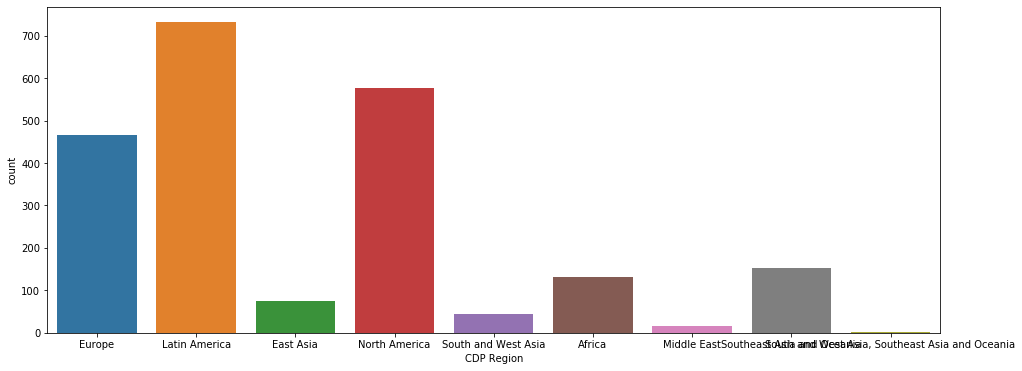

In [14]:
# Number of records (=cities) per region
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x = 'CDP Region', data = geo_data)

In [15]:
# Cities does not have a unique account number
print("---- On the full dataset ----")
print(f"Number of countries : {geo_data.groupby(by = 'Country')['Country'].count().size}")
print(f"Number of cities : {geo_data.groupby(by = 'City')['City'].count().size}")
print(f"Number of account number : {geo_data.groupby(by = 'Account Number')['Account Number'].count().size}")
print("\n---- Only for rows with emissions ----")
print(f"Number of countries : {geo_data[~has_no_emissions].groupby(by = 'Country')['Country'].count().size}")
print(f"Number of cities : {geo_data[~has_no_emissions].groupby(by = 'City')['City'].count().size}")
print(f"Number of account number : {geo_data[~has_no_emissions].groupby(by = 'Account Number')['Account Number'].count().size}")

---- On the full dataset ----
Number of countries : 98
Number of cities : 723
Number of account number : 1085

---- Only for rows with emissions ----
Number of countries : 68
Number of cities : 381
Number of account number : 573


In [16]:
# how many times does a city appear in the report?
# 76 cities appear 4 times, since there are 3 reports it seems weird
geo_data['City'].value_counts().value_counts()

3    276
2    191
1    179
4     76
7      1
Name: City, dtype: int64

In [17]:
# How many cities recorded per country? (null value of cities are included, the top 20 countries are shown)
print(geo_data.groupby(by = 'Country')['Country'].count().sort_values(ascending = False)[:20])

Country
United States of America                                497
Brazil                                                  267
Argentina                                               162
Mexico                                                   82
Canada                                                   80
Colombia                                                 73
Portugal                                                 65
Italy                                                    62
United Kingdom of Great Britain and Northern Ireland     55
Denmark                                                  47
Peru                                                     45
Australia                                                45
Sweden                                                   39
India                                                    36
South Africa                                             33
Chile                                                    30
Philippines                     

In [29]:
# Let's see an example
geo_data[geo_data['Country']=='France'];

## Can we infer city name from 'Organization' ?

In (I guess) all cases the name of the city can be extracted from Organization

The question is: does the emission measurment concerns only the city, or a breader area? 

I checked on some examples below and in many cases the area covered in the emission measurment is the city itself (when `Administrative city boundary = City / Municipality	` and `Inventory boundary = Same – covers entire city and nothing else`)

In [19]:
# Ratio of missing  values (%)
geo_data.isna().sum() / geo_data.shape[0] * 100

Account Number                                                    0.000000
Organization                                                      0.000000
City                                                             22.586521
Country                                                           0.000000
CDP Region                                                        0.000000
Reporting Authority                                               0.000000
Access                                                            0.000000
City-wide emissions inventory                                    13.570128
Administrative city boundary                                      0.136612
Inventory boundary (compared to Administrative city boundary)    33.788707
Land area (in square km)                                         65.072860
City Location                                                    27.459016
dtype: float64

In [20]:
# Can we infer the name of cities from 'Organization' when 'City' is missing ?

geo_data[geo_data['City'].isna()].sample(10)

,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,City-wide emissions inventory,Administrative city boundary,Inventory boundary (compared to Administrative city boundary),Land area (in square km),City Location
133,60400,Municipalidad de Temuco,NaN,Chile,Latin America,"CDP Cities, ICLEI - Local Governments for Sust...",public,In progress,not present in this year's report,NaN,NaN,NaN
1655,847246,La Francia,NaN,Argentina,Latin America,not present in this year's report,public,Yes,City / Municipality,Same – covers entire city and nothing else,9.64,NaN
1167,826380,Junta Intermunicipal de la Cuenca Baja del Rio...,NaN,Mexico,Latin America,"CDP Cities, ICLEI - Local Governments for Sust...",public,NaN,not present in this year's report,NaN,NaN,NaN
1894,54305,Rajkot Municipal Corporation,NaN,India,South and West Asia,not present in this year's report,public,Yes,City / Municipality,Same – covers entire city and nothing else,129.21,NaN
1265,54367,Melaka Historic City Council,NaN,Malaysia,Southeast Asia and Oceania,"CDP Cities, ICLEI - Local Governments for Sust...",public,Yes,not present in this year's report,Partial – covers part of the city and adjoinin...,NaN,NaN
1858,848135,San Pedro de la Paz,NaN,Chile,Latin America,not present in this year's report,public,Intending to undertake in the next 2 years,City / Municipality,NaN,112.50,NaN
2184,54327,Semarang City Government,NaN,Indonesia,Southeast Asia and Oceania,not present in this year's report,public,Yes,City / Municipality,Same – covers entire city and nothing else,373.70,NaN
1900,843399,Wandsworth Council,NaN,United Kingdom of Great Britain and Northern I...,Europe,not present in this year's report,public,Yes,Local government area within a greater city / ...,Same – covers entire city and nothing else,34.30,NaN
1803,73663,Correa,NaN,Argentina,Latin America,not present in this year's report,public,Yes,City / Municipality,Same – covers entire city and nothing else,330.00,NaN
390,834120,City of Tanjungpinang,NaN,Indonesia,Southeast Asia and Oceania,"CDP Cities, ICLEI - Local Governments for Sust...",public,NaN,not present in this year's report,NaN,NaN,NaN


In [21]:
# checking for some 'Account Number' from the previous table if there is one record that contains the city name,
# but it is not the case
geo_data[
    geo_data['Account Number'] == 841491
]

,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,City-wide emissions inventory,Administrative city boundary,Inventory boundary (compared to Administrative city boundary),Land area (in square km),City Location
2142,841491,Muar Municipal Council,NaN,Malaysia,Southeast Asia and Oceania,not present in this year's report,public,Yes,City / Municipality,Same – covers entire city and nothing else,1376.0,NaN


In [22]:
# This column is only present in 2020's report
geo_data['Administrative city boundary'].value_counts()

not present in this year's report                                                 1420
City / Municipality                                                                653
Metropolitan area                                                                   25
Local government area within a greater city / metropolitan area                     24
Province / County                                                                   19
Independent city                                                                    13
Special city                                                                         6
Independent province: Local government area within a city/metropolitian area         4
Intercommunality                                                                     4
Sovereign city-state                                                                 3
Federal district                                                                     3
Other, please specify: Intermunicipalidad  

# Temporal coverage

- a bit of engineering is required to split start/end year in two separated columns
- most years are between 2014 and 2018 but ranges from 1990 to 2021
- in almost every cases the emissions are given over a one-year window

'Year Reported to CDP' and 'Last update' all have the same value in the same year's report (2020 for example)

In [23]:
data['Accounting year'].head()

0                          -
1                        NaN
2                          -
3    2016-01-01 - 2016-12-31
4    2016-01-01 - 2016-12-31
Name: Accounting year, dtype: object

In [24]:
# split 'Accounting year' in start/end date and cast to datetime format
data['Accounting year start'] = data['Accounting year'].str.split(' - ', n = 1, expand = True)[0]
data['Accounting year end'] = data['Accounting year'].str.split(' - ', n = 1, expand = True)[1]

data['Accounting year start'] = pd.to_datetime(data['Accounting year start'], errors = 'coerce')
data['Accounting year end'] = pd.to_datetime(data['Accounting year end'], errors = 'coerce')

In [25]:
# there are many missing values
# in most cases both start/end date are missing
data[['Accounting year start', 'Accounting year end']].isna().sum()

Accounting year start    684
Accounting year end      692
dtype: int64

In [26]:
# they are null both at same time 
data[ data['Accounting year start'].isna() & data['Accounting year end'].isna() ].shape[0]

684

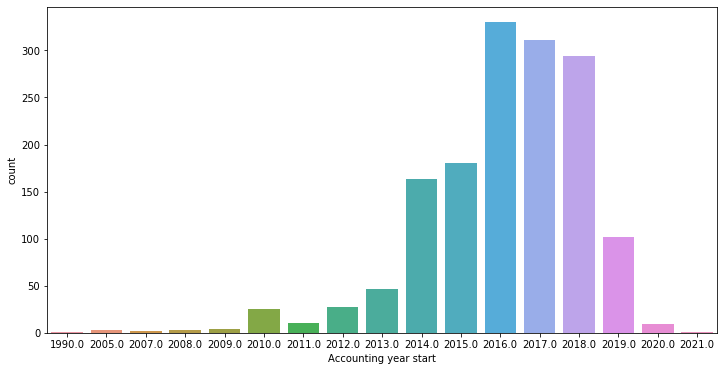

In [27]:
# distribution of 'Accounting year start'
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x = data['Accounting year start'].dt.year)

In [28]:
# For which period of time are emissions given ?
(data['Accounting year end'] - data['Accounting year start']).value_counts()

364 days     1084
365 days      383
366 days       14
363 days        6
362 days        2
-1 days         2
361 days        2
367 days        2
729 days        2
11 days         2
700 days        1
1095 days       1
368 days        1
211 days        1
1778 days       1
dtype: int64

# Emissions analysis

Emissions data takes a very wide range of values (= many extreme values)
For each scope they are given as either:
- total emissions
- or split by including/excluding generation of grid-supplied energy
I decided to create a column 'Scope_X' to make analysis easier
Still need to check what are BASIC/BASIC+ emissions


In [184]:
data.iloc[:, 15:29];

In [154]:
# We create a column with the total emissions for each scope.
# It was verified that when we have 'TOTAL Scope 1 Emissions (metric tonnes CO2e)' we do not have the including/excluding grid supplied energy
# and vice-versa
# the rows with missing values are kept as missing values thanks to 'min_count=1'
data['Scope_1'] = data[
    ['Direct emissions (metric tonnes CO2e) for Total generation of grid-supplied energy',
    'Direct emissions (metric tonnes CO2e) for Total emissions (excluding generation of grid-supplied energy)',
     'TOTAL Scope 1 Emissions (metric tonnes CO2e)']
].sum(axis=1, min_count=1)

data['Scope_2'] = data[
    ['Indirect emissions from use of grid supplied energy (metric tonnes CO2e) for Total generation of grid supplied energy',
    'Indirect emissions from use of grid supplied energy (metric tonnes CO2e) for Total Emissions (excluding generation of grid-supplied energy)',
    'TOTAL Scope 2 emissions (metric tonnes CO2e)']
].sum(axis=1, min_count=1)

data['Scope_3'] = data[
    ['Emissions occurring outside city boundary (metric tonnes CO2e) for Total Generation of grid supplied energy',
    'Emissions occurring outside city boundary (metric tonnes CO2e) for Total Emissions (excluding generation of grid-supplied energy)',
    'TOTAL Scope 3 Emissions']
].sum(axis=1, min_count=1)

In [156]:
# The data is terribly skewed, there are some values so high that we cannot plot it on an histogram
data[['Scope_1', 'Scope_2', 'Scope_3']].describe(percentiles=[0.25, 0.5, 0.75])

,Scope_1,Scope_2,Scope_3
count,1.050000e+03,8.860000e+02,7.400000e+02
mean,7.064448e+06,3.505205e+06,9.814598e+05
std,6.555365e+07,2.043567e+07,9.549138e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.429950e+05,4.932824e+04,3.681743e+03
50%,9.796500e+05,3.671087e+05,6.526900e+04
75%,4.031084e+06,2.145377e+06,3.440235e+05
max,2.054673e+09,4.895976e+08,2.500000e+08


In [165]:
data[['Scope_1', 'Scope_2', 'Scope_3']].skew(axis=0, skipna=True)

Scope_1    29.378720
Scope_2    18.326942
Scope_3    24.313194
dtype: float64

In [193]:
# Top values for scope 1
data[['Country', 'Organization', 'Administrative city boundary','Scope_1']].sort_values(
    by='Scope_1', ascending=False)[:15]

,Country,Organization,Administrative city boundary,Scope_1
1758,Indonesia,Bogor Regency,City / Municipality,2.054673e+09
2058,Mexico,Gobierno Municipal de Toluca de Lerdo,City / Municipality,4.110149e+08
994,Canada,City of Hamilton,not present in this year's report,2.145570e+08
2177,United States of America,City of Charlotte,City / Municipality,1.567829e+08
701,"Taiwan, Greater China",Kaohsiung City Government,not present in this year's report,6.998418e+07
2138,United States of America,Chicago Metropolitan Mayors Caucus,Metropolitan area,6.674623e+07
766,China,Zhenjiang Municipal People's Government,not present in this year's report,6.167420e+07
1403,"Taiwan, Greater China",Taichung City Government,not present in this year's report,5.702375e+07
1171,"Taiwan, Greater China",Taichung City Government,not present in this year's report,5.702375e+07
1503,Russian Federation,Moscow Government,Independent city,5.354719e+07


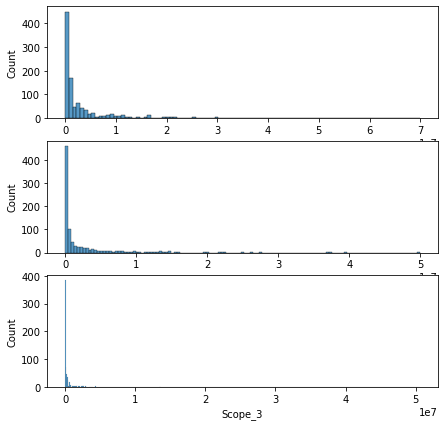

In [183]:
# Extreme values are filtered out so we can have a look at the distribution
fig, axes = plt.subplots(3, 1, figsize=(7, 7))
sns.histplot(x = data[data['Scope_1'] < 1e8].loc[:, 'Scope_1'], ax=axes[0])
sns.histplot(x = data[data['Scope_2'] < 1e8].loc[:, 'Scope_2'], ax=axes[1])
sns.histplot(x = data[data['Scope_3'] < 1e8].loc[:, 'Scope_3'], ax=axes[2])

In [195]:
data['Scope_2'].isna().sum()

1310

# Gazes included

In [25]:
data['Gases Included'].value_counts()

CH4, CO2, N20                          758
GPC gases                              184
CO2                                    177
CH4, CO2, HFCs, N20, NF3, PFCs, SF6    127
CH4, CO2, HFCs, N20, PFCs, SF6          68
CH4, CO2                                31
CH4, CO2, HFCs, N20                     23
CH4, CO2, HFCs, N20, PFCs               12
CH4, CO2, N20, SF6                       7
CH4, CO2, N20, NF3, SF6                  7
CH4, CO2, HFCs, N20, SF6                 6
CO2, N20                                 5
CH4, CO2, HFCs                           3
CO2, HFCs, N20, NF3, PFCs, SF6           3
CO2, HFCs, N20, PFCs, SF6                2
CH4, CO2, N20, PFCs, SF6                 2
CH4, CO2, SF6                            2
CO2, N20, PFCs                           1
CH4, CO2, HFCs, NF3, PFCs, SF6           1
CH4, CO2, HFCs, N20, NF3, SF6            1
CH4, CO2, HFCs, PFCs, SF6                1
Name: Gases Included, dtype: int64